# **Sentiment Analysis of Real-time Flipkart Product Reviews**

**Objective:** The objective of this project is to classify customer reviews as positive or negative and understand the pain points of customers who write negative reviews. By analyzing the sentiment of reviews, we aim to gain insights into product features that contribute to customer satisfaction or dissatisfaction.

**Dataset:** The dataset consists of 8,518 reviews for the "YONEX MAVIS 350 Nylon Shuttle" product from Flipkart. Each review includes features such as Reviewer Name, Rating, Review Title, Review Text, Place of Review, Date of Review, Up Votes, and Down Votes.

### **Loading the data and EDA**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Innomatics/Sentimental Analysis/data.csv")

print(df.shape)
df.head()

(8518, 8)


,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [4]:
#renaming the columns
df.rename(columns={'Reviewer Name': 'reviewer_name', 'Review Title': 'review_title', 'Place of Review': 'place_of_review', 'Up Votes': 'up_votes', 'Down Votes': 'down_votes',
                   'Month': 'month', 'Review text': 'review_text', 'Ratings': 'ratings'}, inplace=True)

In [5]:
import numpy as np

df.replace('',np.nan,inplace=True)

# drop nan values in the data
df.dropna(axis=0, how='any', inplace=True)

In [6]:
df.shape

(8013, 8)

In [7]:
df.loc[0, 'review_text']

'Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.READ MORE'

In [8]:
df['review_text'] = df['review_text'].str.replace('READ MORE', '')

In [9]:
df.loc[0, 'review_text']

'Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.'

In [10]:
df.isnull().sum()

reviewer_name      0
review_title       0
place_of_review    0
up_votes           0
down_votes         0
month              0
review_text        0
ratings            0
dtype: int64

In [11]:
rating_sentiment_mapping = {5: 1, 4: 1, 3: 0, 2: 0, 1: 0}

# Mapping the ratings to sentiments
df['sentiment'] = df['ratings'].map(rating_sentiment_mapping)

In [12]:
df.head()

,reviewer_name,review_title,place_of_review,up_votes,down_votes,month,review_text,ratings,sentiment
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,1
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,0
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,0
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.,5,1
6,Flipkart Customer,Must buy!,"Certified Buyer, Doom Dooma",403.0,121.0,Jan 2020,BEST PURCHASE It is a good quality and is more...,5,1


In [13]:
df['sentiment'].value_counts(normalize=True)

1    0.80644
0    0.19356
Name: sentiment, dtype: float64

In [14]:

from wordcloud import WordCloud

wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(df['review_text']))

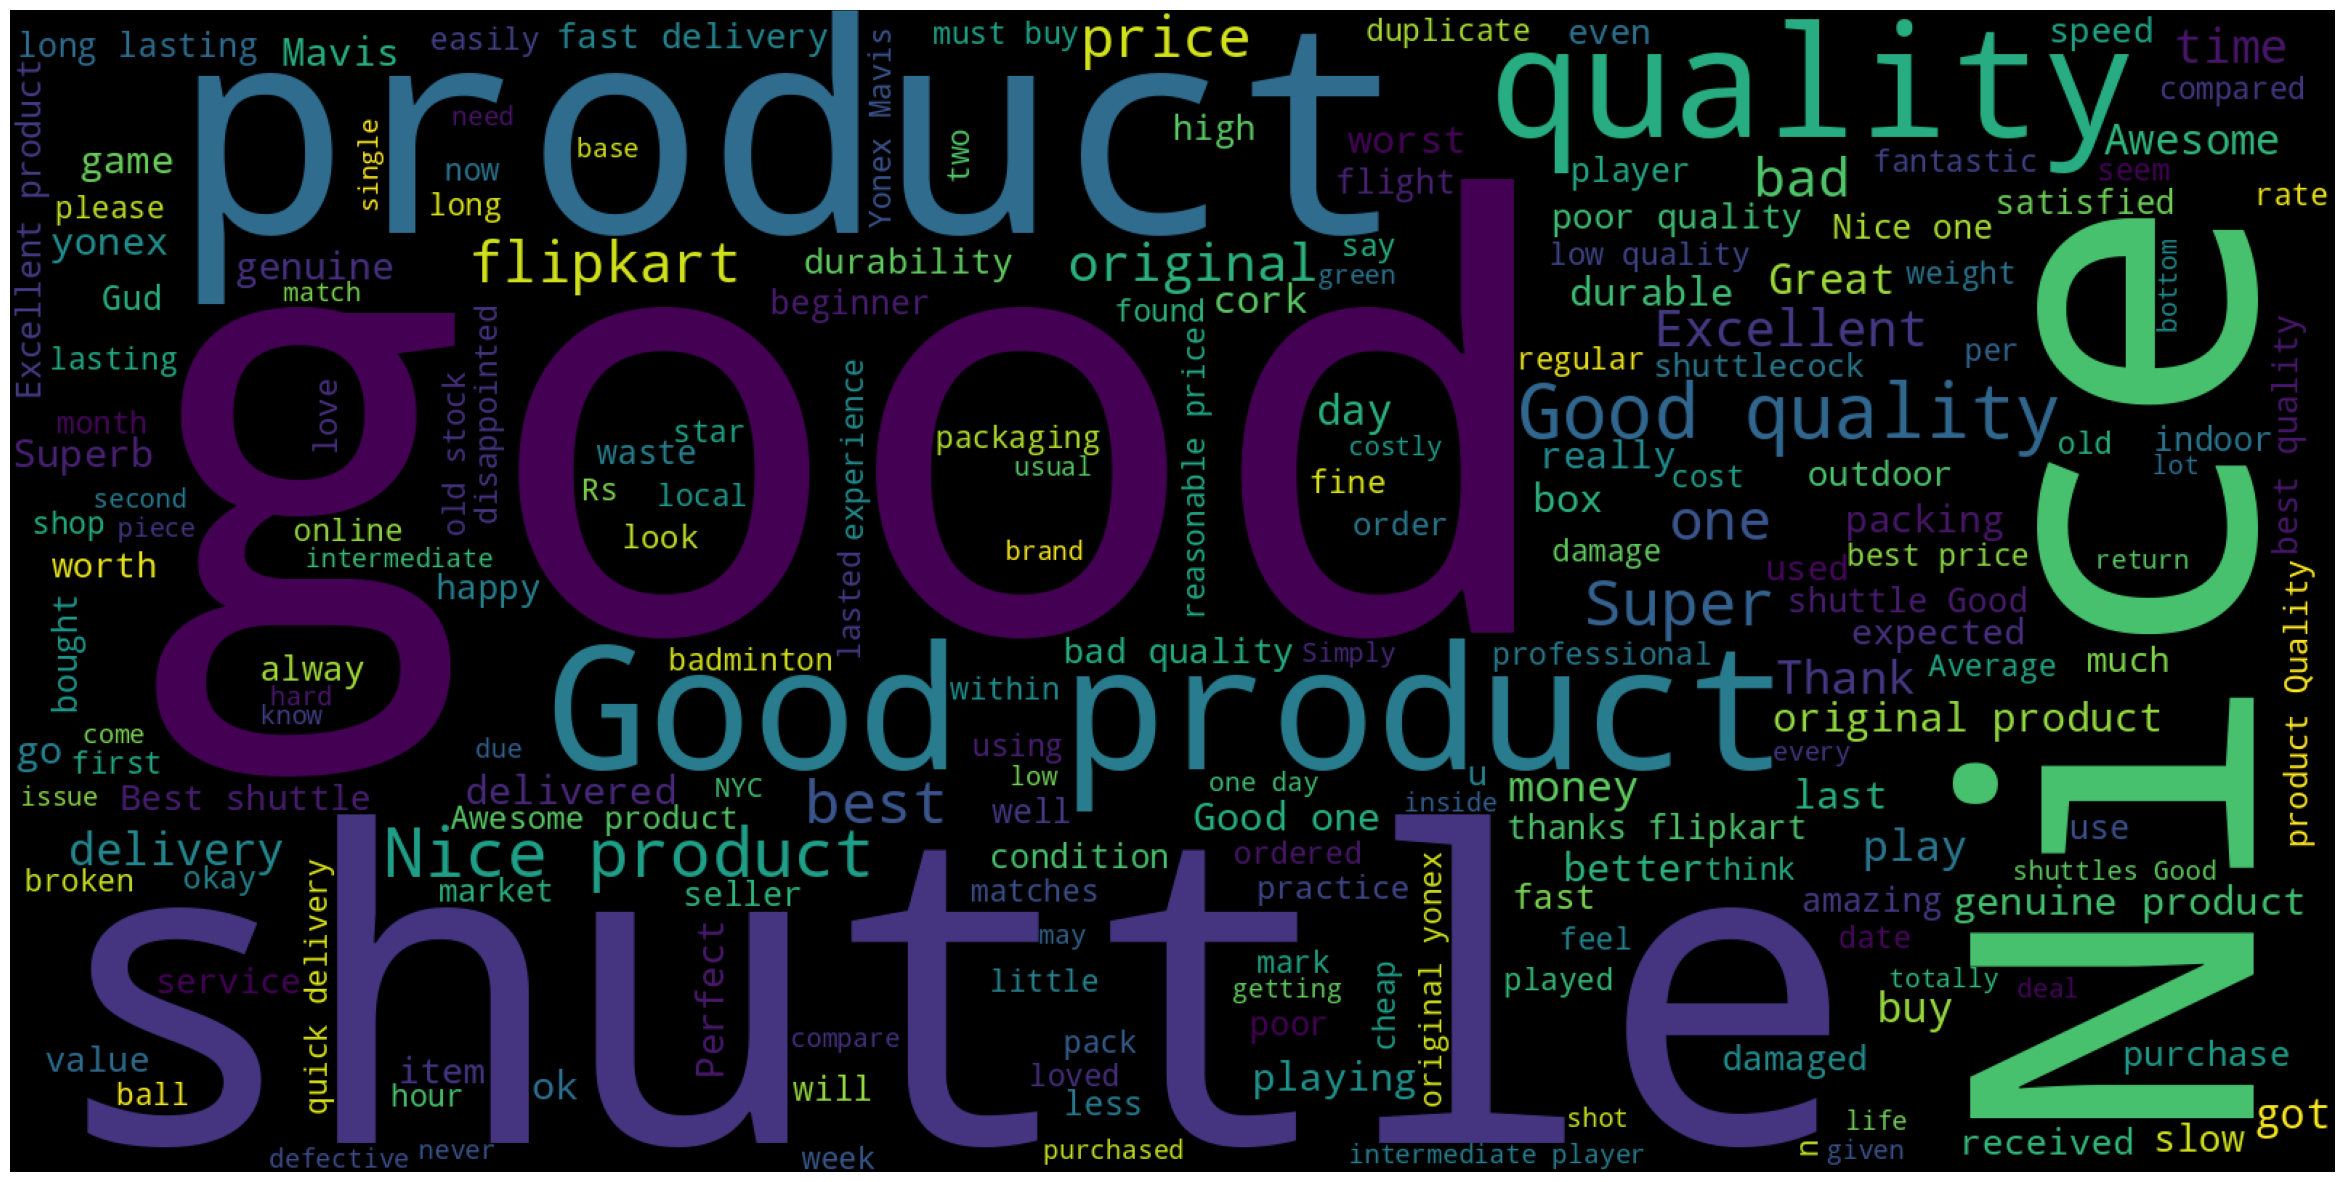

In [15]:
import matplotlib.pyplot as plt

plt.figure(1,figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [16]:
# removing the data where we don't want ratings=3.
df = df[df.ratings != 3]

df.shape

(7438, 9)

In [17]:
df = df[["review_text", "sentiment"]]
df.shape

(7438, 2)

### **Step 1 - Identify Input and Output**

In [18]:
X = df.review_text
y = df.sentiment
print(X.shape, y.shape)

(7438,) (7438,)


### **Step 2 - Split the Data into Train and Test**

In [19]:
from sklearn.model_selection import train_test_split

# By default, it splits 75% training and 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5578,) (5578,)
(1860,) (1860,)


### **Step 3 - Data Preprocessing on Train data (X_train)**

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def display_wordcloud(data):
    wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(data))
    plt.figure(1,figsize=(30,20))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

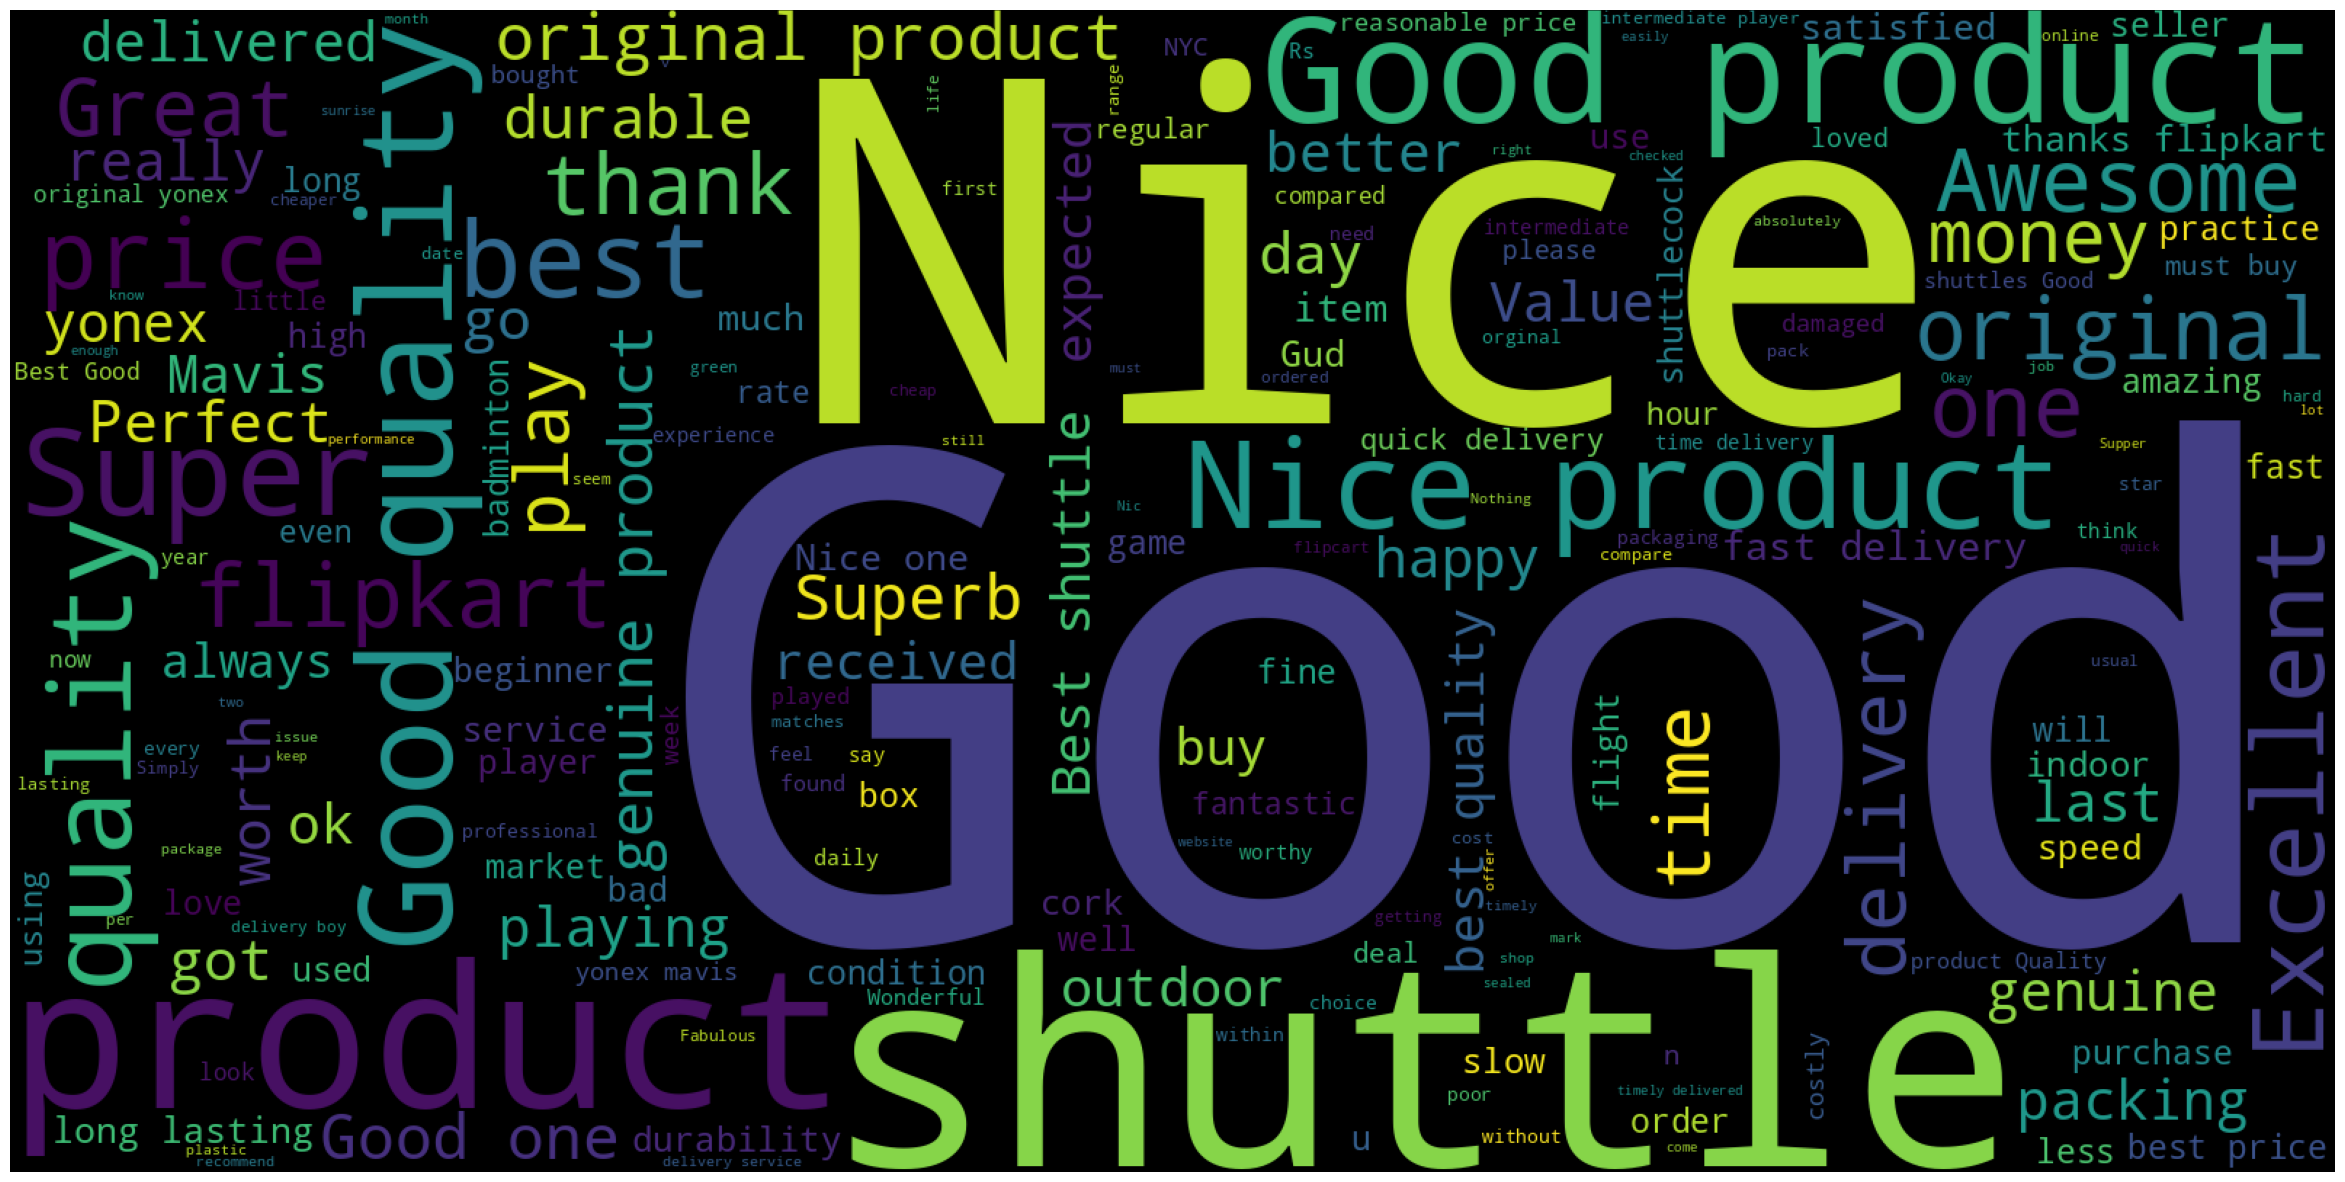

In [21]:
display_wordcloud(X_train[y_train==1])

In [22]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [23]:
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [24]:
def clean(doc): # doc is a string of text
    # Remove punctuation and numbers.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])

    # Remove special characters and punctuation
    doc = re.sub(r"[^a-zA-Z]", " ", doc)

    # Remove special characters and digits
    doc = re.sub(r'\W+', ' ', doc)

    # Remove punctuation
    doc = doc.translate(str.maketrans('', '', string.punctuation))

    # Converting to lower case
    doc = doc.lower()

    # Tokenization
    tokens = nltk.word_tokenize(doc)

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stop word removal
    stop_words = set(stopwords.words('english'))

    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]

    # Join and return
    return " ".join(filtered_tokens)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(preprocessor=clean)

%time X_train_dtm = vect.fit_transform(X_train)

print(X_train_dtm.shape)

CPU times: user 3.21 s, sys: 208 ms, total: 3.42 s
Wall time: 3.46 s
(5578, 2253)


### **Step 4 - Data Preprocessing on Test data (X_test)**

In [26]:
X_test_dtm = vect.transform(X_test)

print(X_test_dtm.shape)

(1860, 2253)


### **Step 5 - Building a Model (i.e. Train the classifier)**

In [27]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
%time nb.fit(X_train_dtm, y_train)

CPU times: user 4.98 ms, sys: 0 ns, total: 4.98 ms
Wall time: 9.58 ms


MultinomialNB()

### **Step 6 - Evaluating on Train Data**

In [28]:
from sklearn import metrics

y_train_pred = nb.predict(X_train_dtm)

print(metrics.accuracy_score(y_train, y_train_pred))

metrics.confusion_matrix(y_train, y_train_pred)

0.9406597346719254


array([[ 508,  256],
       [  75, 4739]])

Text(0.5, 23.52222222222222, 'Predicted')

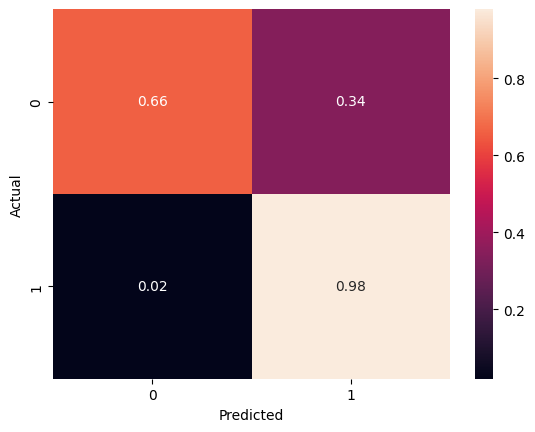

In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(y_train, y_train_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

### **Step 7 - Evaluating on Test Data**

In [30]:
y_test_pred = nb.predict(X_test_dtm)

metrics.accuracy_score(y_test, y_test_pred)

0.932258064516129

Text(0.5, 23.52222222222222, 'Predicted')

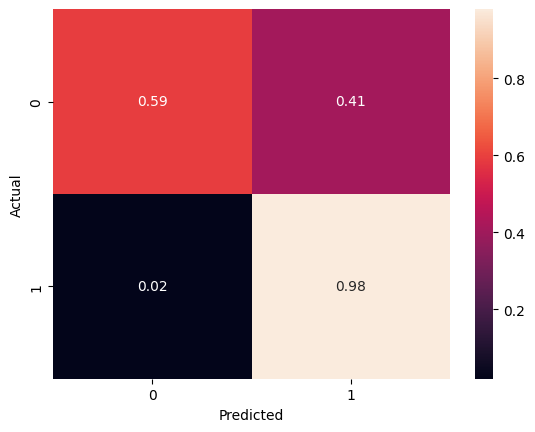

In [31]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [32]:
print("Train Score (F1 Score):", metrics.f1_score(y_train, y_train_pred))

print("Test Score (F1 Score):", metrics.f1_score(y_test, y_test_pred))

Train Score (F1 Score): 0.9662554796615354
Test Score (F1 Score): 0.9623205741626795


### **Going Back and Applying all the Steps Again**

In [33]:
vect = CountVectorizer(preprocessor=clean, max_features=5000)
%time X_train_dtm = vect.fit_transform(X_train)

X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape, X_test_dtm.shape)

CPU times: user 1.66 s, sys: 105 ms, total: 1.77 s
Wall time: 1.78 s
(5578, 2253) (1860, 2253)


In [34]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
%time nb.fit(X_train_dtm, y_train)

CPU times: user 5.13 ms, sys: 0 ns, total: 5.13 ms
Wall time: 5.91 ms


MultinomialNB()

In [35]:
y_train_pred = nb.predict(X_train_dtm)

metrics.f1_score(y_train, y_train_pred)

0.9662554796615354

Text(0.5, 23.52222222222222, 'Predicted')

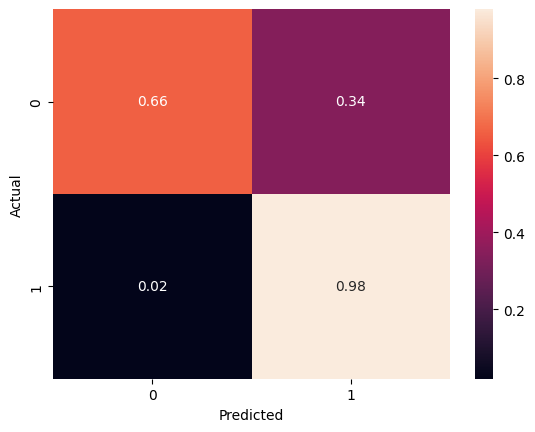

In [36]:
cm = metrics.confusion_matrix(y_train, y_train_pred)

actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [37]:
y_test_pred = nb.predict(X_test_dtm)

metrics.f1_score(y_test, y_test_pred)

0.9623205741626795

Text(0.5, 23.52222222222222, 'Predicted')

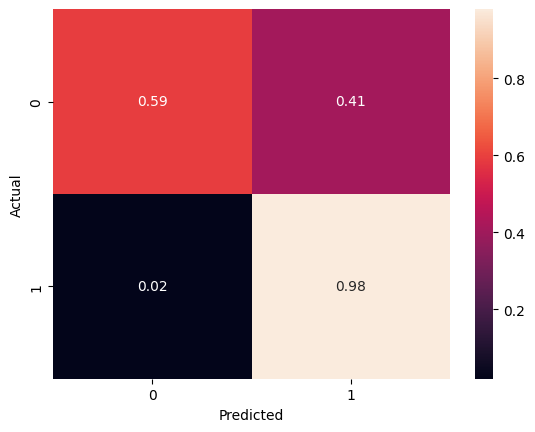

In [38]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

## **Creating an Optimal Workflow**

Pipeline allows you to sequentially apply a list of transformers to preprocess the data and, if desired, conclude the sequence with a final predictor for predictive modeling.

In [39]:
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

In [40]:
import joblib
from joblib import Memory

import os
import warnings

warnings.filterwarnings('ignore')

In [41]:
# Improving the efficiency by applying cleaning the text data before hand

%time X_train_clean = X_train.apply(lambda doc: clean(doc))

CPU times: user 1.76 s, sys: 108 ms, total: 1.87 s
Wall time: 1.9 s


In [42]:
%time X_test_clean = X_test.apply(lambda doc: clean(doc))

CPU times: user 514 ms, sys: 33.3 ms, total: 548 ms
Wall time: 550 ms


In [43]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory),
    'knn' : Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', KNeighborsClassifier())
    ], memory=memory),
    'random_forest': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', RandomForestClassifier())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['elasticnet'],
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ],
    'knn': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'classifier__n_neighbors' : [i for i in range(3, 21, 2)],
            'classifier__p' : [1, 2, 3]
        }
    ],
    'random_forest': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'classifier__n_estimators': [50, 100, 200]
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring='f1',
                               return_train_score=True,
                               verbose=1
                              )

    %time grid_search.fit(X_train_clean, y_train)

    best_models[algo] = grid_search.best_estimator_

    print('Score on Test Data: ', grid_search.score(X_test_clean, y_test))

********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: user 8.86 s, sys: 75.1 ms, total: 8.94 s
Wall time: 9.04 s
Score on Test Data:  0.9615153337342153
********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: user 21.3 s, sys: 98.7 ms, total: 21.4 s
Wall time: 24.4 s
Score on Test Data:  0.9616066154754873
********** logistic_regression **********
Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: user 8min 18s, sys: 572 ms, total: 8min 18s
Wall time: 8min 32s
Score on Test Data:  0.9455445544554456
********** knn **********
Fitting 5 folds for each of 54 candidates, totalling 270 fits
CPU times: user 6min 11s, sys: 24 s, total: 6min 35s
Wall time: 4min 43s
Score on Test Data:  0.9633136094674557
********** random_forest **********
Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: user 1min 9s, sys: 119 ms, total: 1min 9s
Wall time: 1min 10s

In [44]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization', CountVectorizer(max_features=1500)),
                ('classifier', MultinomialNB(alpha=1))])

decision_tree
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization', CountVectorizer(max_features=1500)),
                ('classifier', DecisionTreeClassifier(max_depth=10))])

logistic_regression
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization', CountVectorizer(max_features=2000)),
                ('classifier',
                 LogisticRegression(C=1, class_weight='balanced', l1_ratio=0.4,
                                    penalty='elasticnet', solver='saga'))])

knn
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization', TfidfVectorizer()),
                ('classifier', KNeighborsClassifier(n_neighbors=19))])

random_forest
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization', Tfidf

In [45]:
for name, model in best_models.items():
    print("*"*10, name, "*"*10)

    joblib.dump(model, f'/content/drive/MyDrive/Innomatics/Sentimental Analysis/best_models/{name}.pkl')
    model = joblib.load(f'/content/drive/MyDrive/Innomatics/Sentimental Analysis/best_models/{name}.pkl')

    %time y_test_pred = model.predict(X_test_clean)
    print("Test Score (F1)", metrics.f1_score(y_test, y_test_pred))

    print("Model Size:", os.path.getsize(f'/content/drive/MyDrive/Innomatics/Sentimental Analysis/best_models/{name}.pkl'), "Bytes")

********** naive_bayes **********
CPU times: user 10.8 ms, sys: 0 ns, total: 10.8 ms
Wall time: 10.8 ms
Test Score (F1) 0.9615153337342153
Model Size: 109655 Bytes
********** decision_tree **********
CPU times: user 11 ms, sys: 0 ns, total: 11 ms
Wall time: 11.1 ms
Test Score (F1) 0.9616066154754873
Model Size: 71113 Bytes
********** logistic_regression **********
CPU times: user 10.7 ms, sys: 0 ns, total: 10.7 ms
Wall time: 10.8 ms
Test Score (F1) 0.9455445544554456
Model Size: 90266 Bytes
********** knn **********
CPU times: user 703 ms, sys: 2.94 ms, total: 705 ms
Wall time: 406 ms
Test Score (F1) 0.9633136094674557
Model Size: 352616 Bytes
********** random_forest **********
CPU times: user 251 ms, sys: 987 µs, total: 252 ms
Wall time: 252 ms
Test Score (F1) 0.962608435536943
Model Size: 22014511 Bytes


### **Making prediction on a new datapoint and prints the sentiments.**

In [54]:
from joblib import load

# Load the model
model = load('/content/drive/MyDrive/Innomatics/Sentimental Analysis/best_models/random_forest.pkl')

# Define the datapoint
datapoint = ["Bad product with damage and high price"]

# Predict the sentiment
prediction = model.predict(datapoint)

# Interpret the prediction
result = "Positive" if prediction[0] == 1 else "Negative"

print("Sentiment:", result)

Sentiment: Negative


In [55]:
from joblib import load

# Load the model
model = load('/content/drive/MyDrive/Innomatics/Sentimental Analysis/best_models/random_forest.pkl')

# Define the datapoint
datapoint = ["Good product with super quality and best price"]

# Predict the sentiment
prediction = model.predict(datapoint)

# Interpret the prediction
result = "Positive" if prediction[0] == 1 else "Negative"

print("Sentiment:", result)

Sentiment: Positive
